In [ ]:
import io, os, sys
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

class ST:
  def __init__(self, L, default, f):
    self._def = default
    self._f = f
    self._len = len(L)
    self._size = _size = 1 << (self._len - 1).bit_length()

    self.L = [default] * (2 * _size)
    self.L[_size:_size + self._len] = L
    for i in reversed(range(_size)):
      self.L[i] = f(self.L[i + i], self.L[i + i + 1])

  def __delitem__(self, i):
    self[i] = self._def

  def __getitem__(self, i):
    return self.L[i + self._size]

  def __setitem__(self, i, v):
    i += self._size
    self.L[i] = v
    i >>= 1
    while i:
      self.L[i] = self._f(self.L[2 * i], self.L[2 * i + 1])
      i >>= 1

  def __len__(self):
    return self._len

  def query(self, s, e):
    s += self._size
    e += self._size

    l = r = self._def
    while s < e: 
      if s & 1:
        l = self._f(l, self.L[s])
        s += 1
      if e & 1:
        e -= 1
        r = self._f(self.L[e], r)
      s >>= 1
      e >>= 1

    return self._f(l, r)

def sol():
  N = int(input())
  L = []
  for _ in range(N):
    L.append([*map(int, input().split())])
  
  comp = []
  ci = 0
  L.sort(key= lambda x: x[1]) #좌표 압축을 위해 y좌표 기준으로 정렬한다
  for i, v in enumerate(L):
    if i and v[1] != L[i - 1][1]:
      ci += 1 #구분될 때마다 1씩 증가
    comp.append(ci)
  
  for i, v in enumerate(L): #압축한 좌표로 변환한다
    v[1] = comp[i]

  L.sort(key= lambda x: (x[0], -x[1])) #수직선을 그었다고 생각했을 때 왼쪽 -> 오른쪽, 수직선안에 섬이 2개 이상 있을경우 위 -> 아래로 순회할 수 있게 정렬한다.
  answer = 0
  st = ST([0] * N, 0, lambda x, y: x + y)
  for i, (x, y) in enumerate(L):
    answer += st.query(y, len(L)) #지금까지 찾은 좌표들 중에 y좌표가 현재 좌표보다 큰 것들의 개수를 더한다.
    st[y] += 1 #해당 좌표 방문
  
  sys.stdout.write(str(answer) + '\n')

for _ in range(int(input())):
  sol()

- 특정 조건에 의해서 값이 누적될 것이라는 점만 캐치했다. 나머지는 도저히 모르겠어서 풀이를 참고했다.

### 풀이
- 2차원 평면에서 스위핑을 해야하는 문제이다.
  - 기준이 되는 선분을 긋고, 정렬된 순서대로 처리해 나가는것이 핵심인 것 같다.
  - 물론 선분 내에 여러개의 점이 있을 수 있으므로, 이를 처리하는 정렬기준도 있어야 한다. 축1 기준 -> 축2 기준으로 정렬한다.
- y좌표의 범위가 매우 넓은 반면 섬의 개수는 75000개이므로 좌표정렬을 수행한다.
  - 가장 작은 좌표를 0으로 보고, 그 값이 구분될 때마다 좌표를 1씩 올리는 식으로 구현한다. 코드 주석 참고
- 맨 왼쪽섬에 y축으로 수직선을 긋고, 그 수직선을 오른쪽으로 옮기면서 섬의 개수를 센다.
  - 수직선에 섬이 여러개 있을 경우 북에서 남쪽 순서대로 처리한다.
  - 이를 직관적으로 보자면 이러하다.
    - 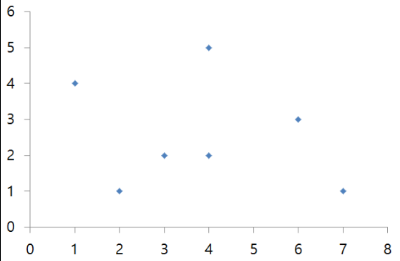
    - 위 그림처럼 섬이 배치돼있다고 할 때 5번째 섬으로 갈 수 있는 쌍은
    - 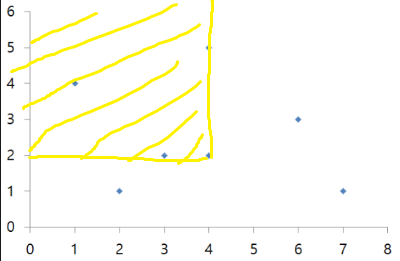
    - 노란색 지역에 있는 섬의 수를 세는것과 같다고 볼 수 있다.
- 누적합 세그먼트 트리를 이용해 이러한 처리를 효과적으로 할 수 있다.
  - 정렬된 배열을 순회해서 세그먼트 트리를 업데이트 하는 것은, 섬을 왼쪽->오른쪽/위->아래의 정렬된 순서대로 처리하는 것과 같다.
  - 그러면서 y축이 더 높은 것으로 돼있는 섬의 총 개수를 세서 answer에 반영하면 정답이 된다.
